In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('student-data.csv')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
missing_value = df.isnull().sum()
print(missing_value)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64


In [7]:
target_dist = df['passed'].value_counts()
print(target_dist)

passed
yes    265
no     130
Name: count, dtype: int64


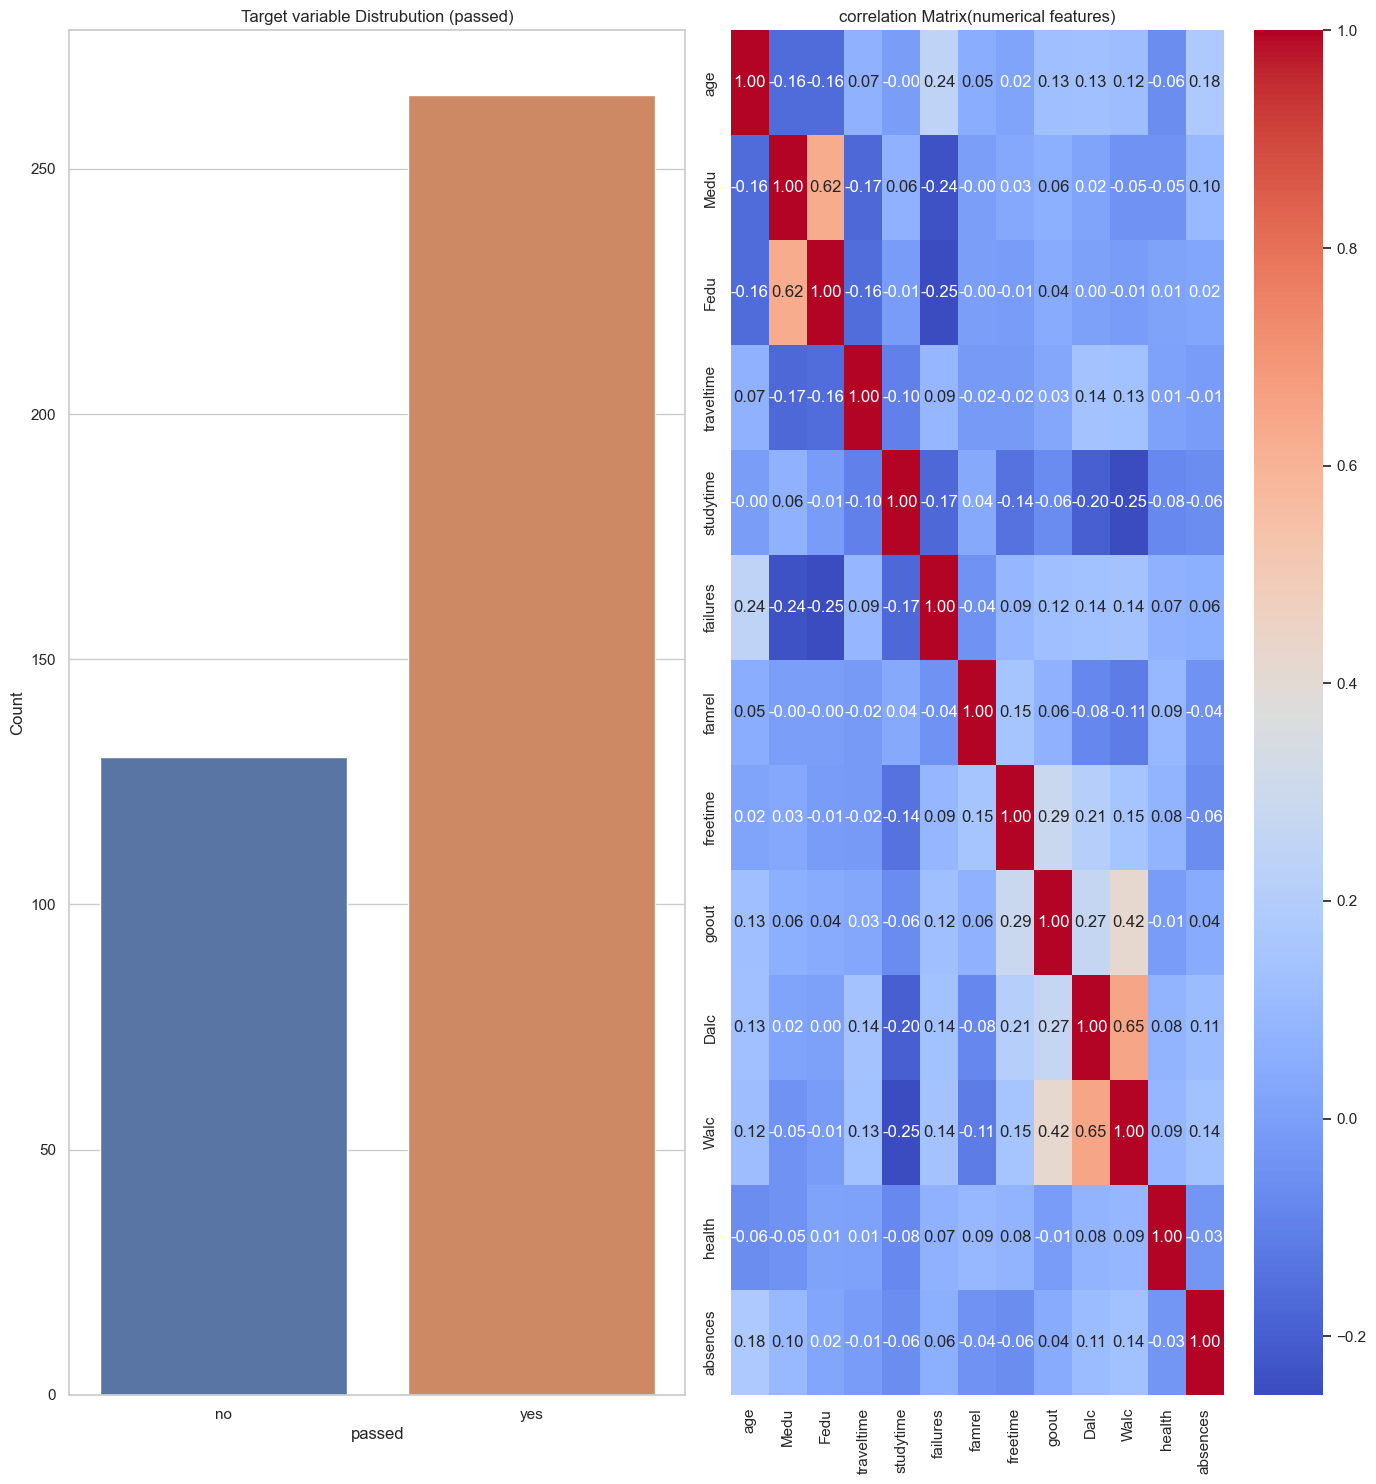

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

numerical_df = df.select_dtypes(include=['int64'])
correlation_matrix = numerical_df.corr()

fig, axes = plt.subplots(1,2, figsize=(14,15)) #plotting

#plot target distrubution
sns.countplot(x='passed', data=df, ax=axes[0])
axes[0].set_title('Target variable Distrubution (passed)')
axes[0].set_ylabel('Count')

#plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('correlation Matrix(numerical features)')

plt.tight_layout()
plt.show()


LABEL ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le



#split into features and target
X = df_encoded.drop("passed", axis = 1)
Y = df_encoded["passed"] 

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

   

((316, 30), (79, 30), (316,), (79,))

Training the model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
#conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

class_report

'              precision    recall  f1-score   support\n\n           0       0.75      0.44      0.56        27\n           1       0.76      0.92      0.83        52\n\n    accuracy                           0.76        79\n   macro avg       0.76      0.68      0.70        79\nweighted avg       0.76      0.76      0.74        79\n'

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


SAVE THE MODEL

In [21]:
import pickle
# Save model and encoders
with open('student_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("✅ Model and encoders saved as 'student_model.pkl' and 'label_encoders.pkl'")

✅ Model and encoders saved as 'student_model.pkl' and 'label_encoders.pkl'


In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('student-data.csv')

# Label encode all object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Use only selected features
features = ['age', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X = df[features]
y = df['passed']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model
pickle.dump(model, open('student_model.pkl', 'wb'))
